In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"
#dataFramePickleAddress="D:/Non-academic/GSOC23/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

,Max Lat per section,Min Lat per section,Max Lon per section,Min Lon per section,No. of spectra per section,Total active time per section,Summed Spectra,Normalized Spectra,Log Normalized Spectra,Aluminum,...,Magnesium,Oxygen,Potassium,Silicon,Thorium,Titanium,Uranium,Denoised Log Scaled Spectra,Continuum Removed Denoised Log Scaled Spectra,Normalized Continuum Removed Denoised Log Scaled Spectra
0,-87.5,-90.0,180.0,-180.0,7002,215153.707937,"[270112.3731329723, 44221.71628033137, 45327.9...","[75.32634479500912, 12.332127585726989, 12.640...","[1.8769468938381042, 1.0910380092016139, 1.101...",15.151,...,3.5168,45.289,299.99,20.793,0.46453,0.17034,0.17684,"[2.158214838616408, 2.157544331369737, 2.15556...","[0.0, 0.0031096864344261066, 0.005679290051129...","[0.0, 0.008732596361173385, 0.0159485365101445..."
1,-82.5,-87.5,-135.0,-180.0,1599,49113.391313,"[101728.76450092324, 11353.802617173642, 10565...","[124.27824075904886, 13.87051756806718, 12.906...","[2.0943950968999223, 1.1420926667518603, 1.110...",13.394,...,4.2240,45.529,376.77,22.029,0.65727,0.11806,0.14017,"[2.166600464940364, 2.1658480356144825, 2.1637...","[0.0, 0.0031162181188209015, 0.005685493606940...","[0.0, 0.00854362748004175, 0.01558772125881830..."
2,-82.5,-87.5,-90.0,-135.0,1940,59600.854365,"[69004.10988058499, 13041.311258502305, 12455....","[69.4662289143658, 13.12864863838364, 12.53878...","[1.8417737231418783, 1.118220025472807, 1.0982...",13.634,...,3.5352,44.660,375.20,20.907,0.59783,0.16417,0.25209,"[2.1624604406884194, 2.1617557577637347, 2.159...","[0.0, 0.003128077634203974, 0.0057268713902404...","[0.0, 0.008671523159558032, 0.0158757881675521..."
3,-82.5,-87.5,-45.0,-90.0,1818,55864.552890,"[51455.21453525051, 11348.088811988011, 11487....","[55.264254565457236, 12.188146033430378, 12.33...","[1.742444316396172, 1.085937649122431, 1.09122...",14.642,...,3.6490,44.706,255.60,20.687,0.44024,0.21359,0.15456,"[2.156835106449848, 2.156137776072336, 2.15427...","[0.0, 0.0031223821127568385, 0.005761526562635...","[0.0, 0.008548415452029046, 0.0157738293766423..."
4,-82.5,-87.5,0.0,-45.0,1855,57007.157885,"[51138.233213284286, 10203.879826977849, 12005...","[53.82296024948041, 10.739577490433051, 12.635...","[1.7309675801735431, 1.030987195964759, 1.1015...",14.030,...,3.4253,44.777,299.84,20.930,0.41695,0.00000,0.17853,"[2.1550525786763455, 2.15430812063849, 2.15245...","[0.0, 0.0030380779680346803, 0.005615903444584...","[0.0, 0.00860571082569534, 0.01590770269151066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,87.5,82.5,45.0,0.0,1748,53653.126808,"[172204.68795185376, 12837.986652251333, 11392...","[192.57556626933405, 14.356650673799725, 12.73...","[2.2846011835800297, 1.1570531332525222, 1.105...",14.908,...,4.8716,44.940,935.92,20.180,1.65770,0.11112,0.47992,"[2.15549824869262, 2.1548999596086973, 2.15302...","[0.0, 0.0031042509343501834, 0.005683791947784...","[0.0, 0.008672476703310141, 0.0158790491800041..."
1786,87.5,82.5,90.0,45.0,2035,62483.348769,"[69631.4865040512, 13027.290796013549, 12597.1...","[66.8640409410214, 12.509531949810704, 12.0964...","[1.8251926197192418, 1.0972410606592737, 1.082...",14.201,...,4.9509,45.074,725.37,20.989,1.47520,0.23089,0.31377,"[2.14741575183071, 2.14686561246586, 2.1451899...","[0.0, 0.003080477682960492, 0.0056969814199795...","[0.0, 0.008773223933367814, 0.0162250465303427..."
1787,87.5,82.5,135.0,90.0,1903,58474.988092,"[58870.11519813659, 11691.651373354718, 11794....","[60.40543191435932, 11.996566485773727, 12.102...","[1.781075993991352, 1.07905696524328, 1.082869...",14.718,...,3.5729,44.902,615.29,20.763,1.13880,0.14168,0.36836,"[2.1464838830391613, 2.1458006278534687, 2.143...","[0.0, 0.003018919479894744, 0.0055261654685280...","[0.0, 0.008498570047967925, 0.0155567263862845..."
1788,87.5,82.5,180.0,135.0,1902,58399.244640,"[69077.49428235987, 10543.676356979646, 11999....","[70.97094632772614, 10.832684314943478, 12.328...","[1.85108059

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

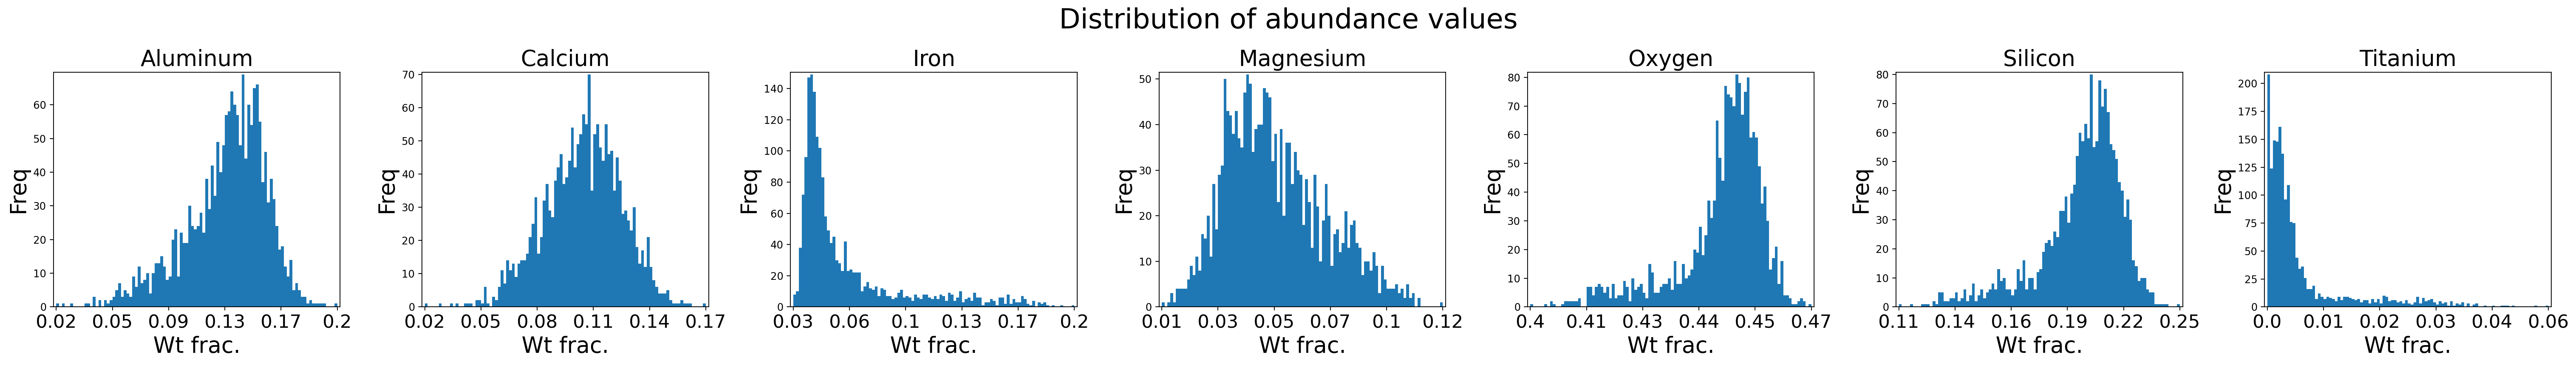

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

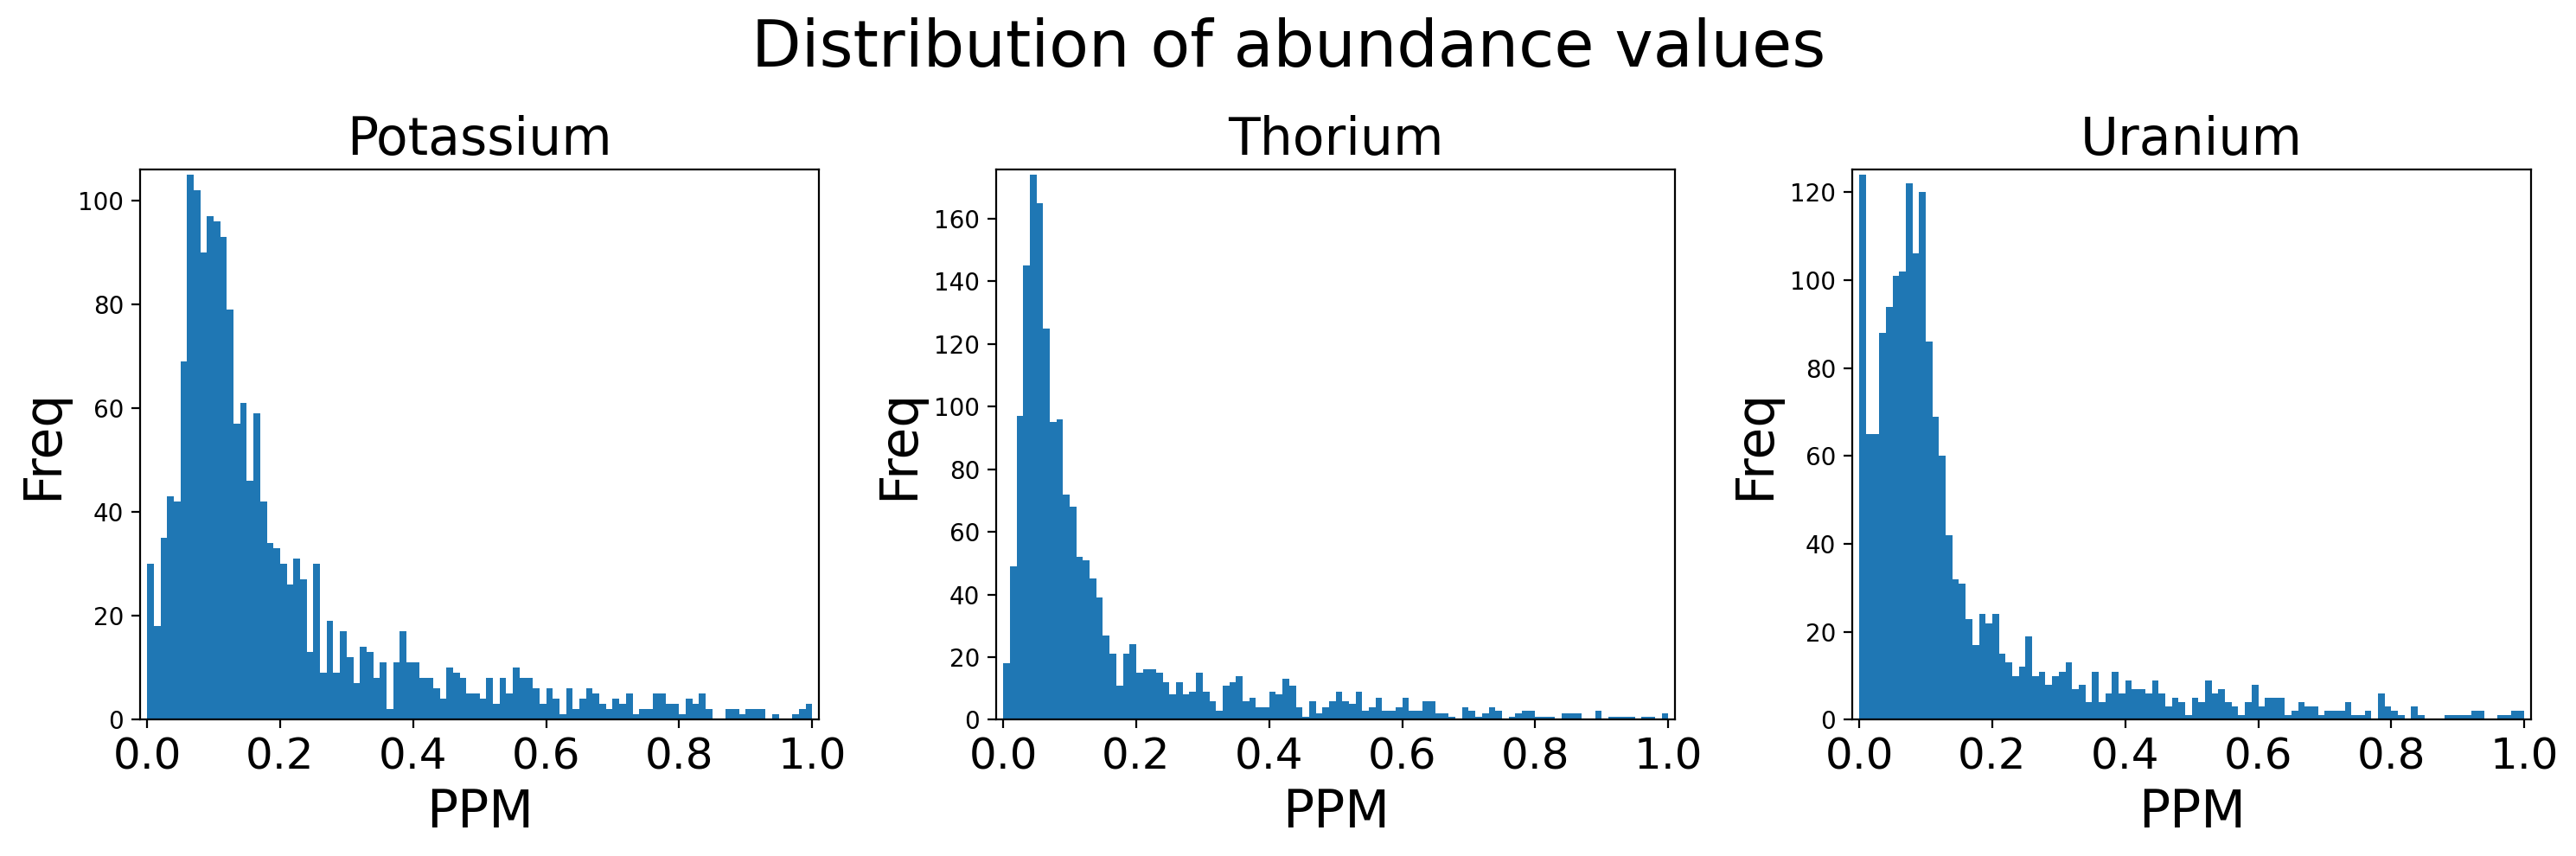

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

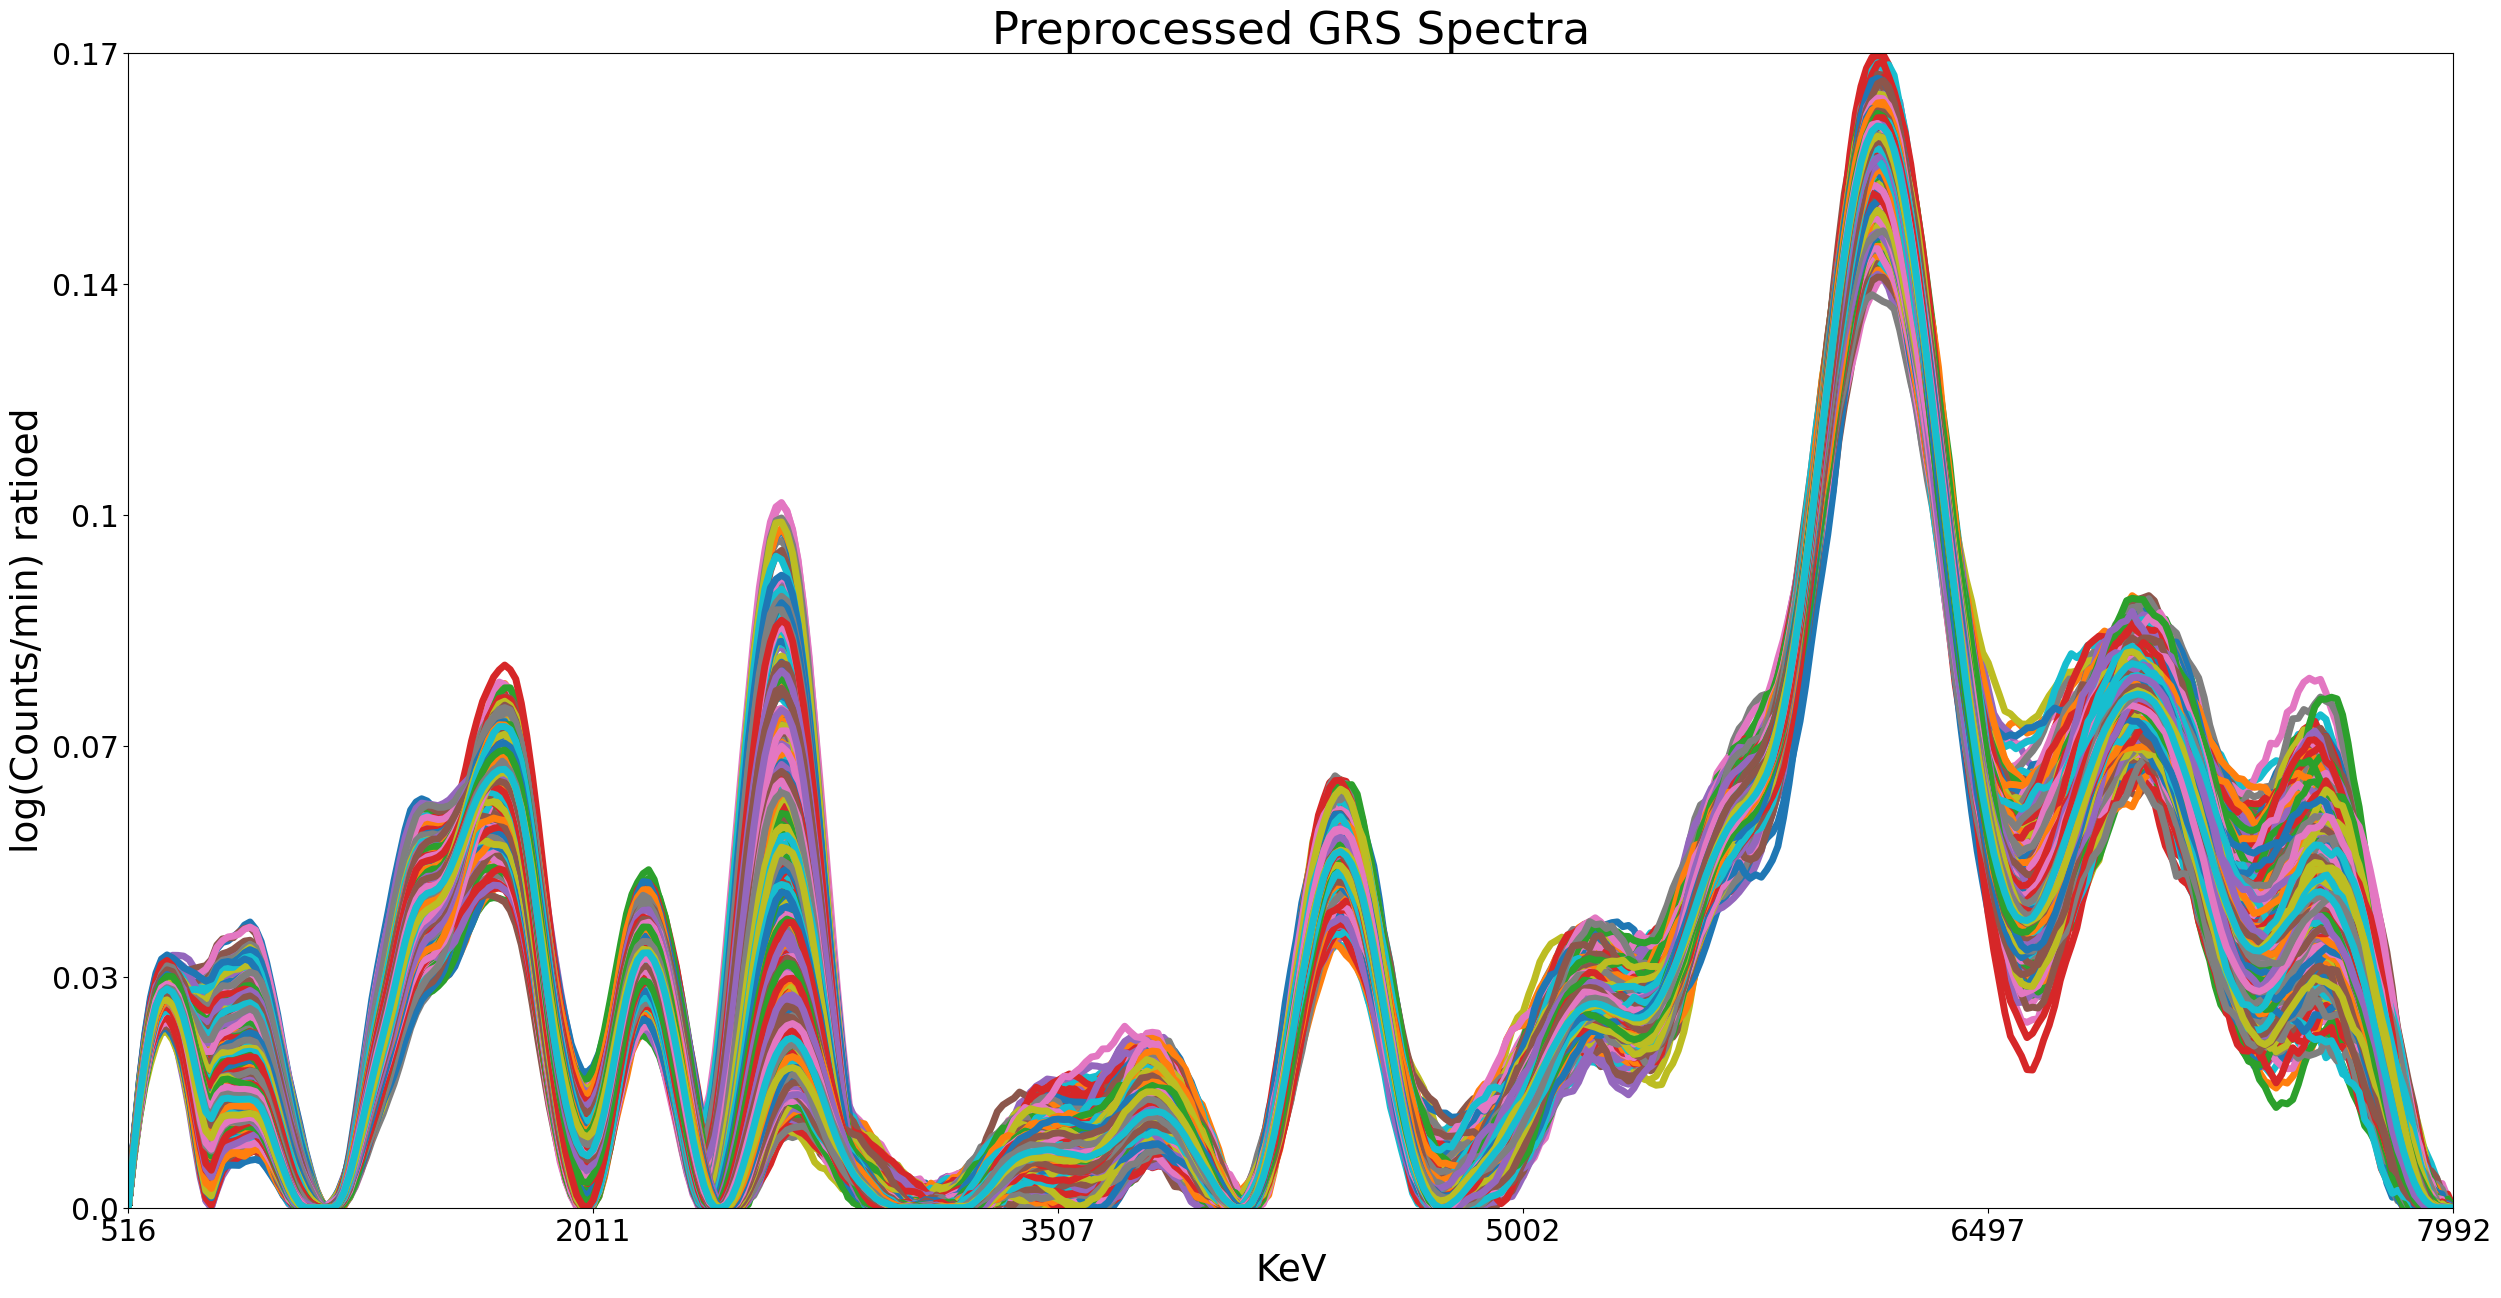

In [23]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [24]:
#import PCA from sklearn
from sklearn.decomposition import PCA
#import cosine distance from scipy
from scipy.spatial.distance import cosine as cosineDistance

#define a function which given an array of spectra, explained-variance ratio, and no of spectra to be selected
#returns the indices of most interesting (most unlike the others) spectra
def extractMostExtremeSpectraWithDEMUD(spectra,varianceToExplain,noOfSpectraToRetrive):
    #create an array to hold the indices of the selected (interesting) super-pixels
    selectedSpectraIndices=[]
    #create a PCA object which explains over 95% of the variance in the data
    pcaObject=PCA(n_components=varianceToExplain,
                  svd_solver='auto')
    #compute the PCA model for the spectra and use it to reconstruct the orginal spectra
    reconstructedSpectra=pcaObject.inverse_transform(pcaObject.fit_transform(spectra))
    #create an array to save the reconstruction error (cosine distance)
    reconstructionErrors=np.full(spectra.shape[0],
                                 np.nan)
    #compute the cosine distance between the orginal and reconstructed spectra
    for i in range(spectra.shape[0]):
        reconstructionErrors[i]=cosineDistance(spectra[i,:],
                                               reconstructedSpectra[i,:])
    #save the index of the spectra with the greatest error
    selectedSpectraIndices.append(np.argmax(reconstructionErrors))

    #iteratively extract the most dissimar spectra
    for i in range(noOfSpectraToRetrive-1):
        #fit PCA to the selected spectra
        pcaObject.fit(spectra[selectedSpectraIndices,:])
        #apply PCA and then reconstruct the spectra
        reconstructedSpectra=pcaObject.inverse_transform(pcaObject.transform(spectra))
        #create an array to save the reconstruction error (cosine distance)
        reconstructionErrors=np.full(spectra.shape[0],np.nan)
        #compute the cosine distance between the orginal and reconstructed spectra
        for i in range(spectra.shape[0]):
            reconstructionErrors[i]=cosineDistance(spectra[i,:],
                                                   reconstructedSpectra[i,:])
        #remove the error of the selected pixels
        reconstructionErrors=np.delete(reconstructionErrors,
                                       selectedSpectraIndices)
        #get the index of the spectra with the greatest error
        selectedSpectraIndices.append(np.delete(np.arange(0,spectra.shape[0],1),
                                                selectedSpectraIndices,axis=0)[np.argmax(reconstructionErrors)])
        
    return selectedSpectraIndices

In [25]:
#set parameters for extracting differing spectra
varianceToBeExplainedDuringDEMUD=0.9
noOfExtremeSpectraToBeRetrieved=179
#get indices of the most extreme spectra
extremeIndices=extractMostExtremeSpectraWithDEMUD(preprocessedSpectra,
                                                  varianceToExplain=varianceToBeExplainedDuringDEMUD,
                                                  noOfSpectraToRetrive=noOfExtremeSpectraToBeRetrieved)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


In [26]:
#get the subset data
#spectra
preprocessedSpectra=preprocessedSpectra[extremeIndices,:]
#regular abundances
regularElementalAbundances=regularElementalAbundances[extremeIndices,:]
#nuclear abundances
nuclearElementalAbundances=nuclearElementalAbundances[extremeIndices,:]

In [27]:
#scale the spectra
preprocessedSpectra=preprocessedSpectra*1000

In [28]:
preprocessedSpectra=preprocessedSpectra.astype('float64')
regularElementalAbundances=regularElementalAbundances.astype('float64')
nuclearElementalAbundances=nuclearElementalAbundances.astype('float64')

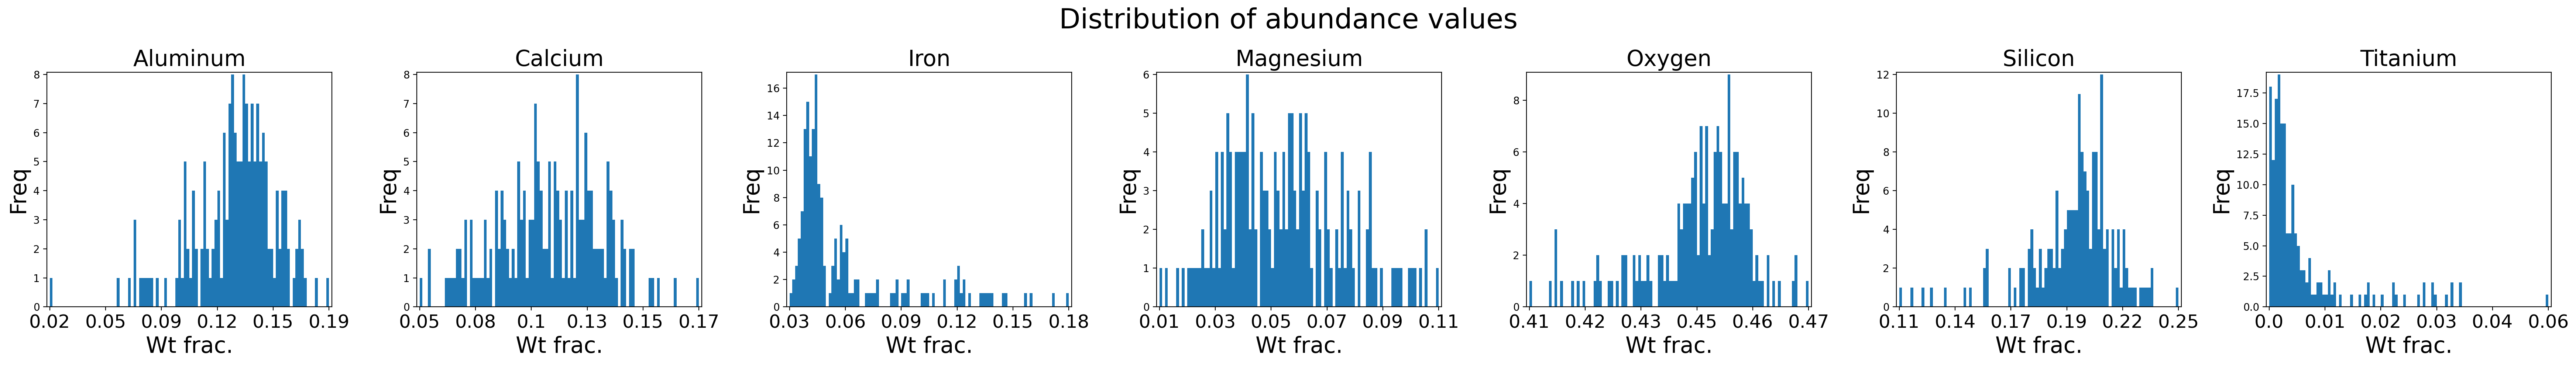

In [29]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

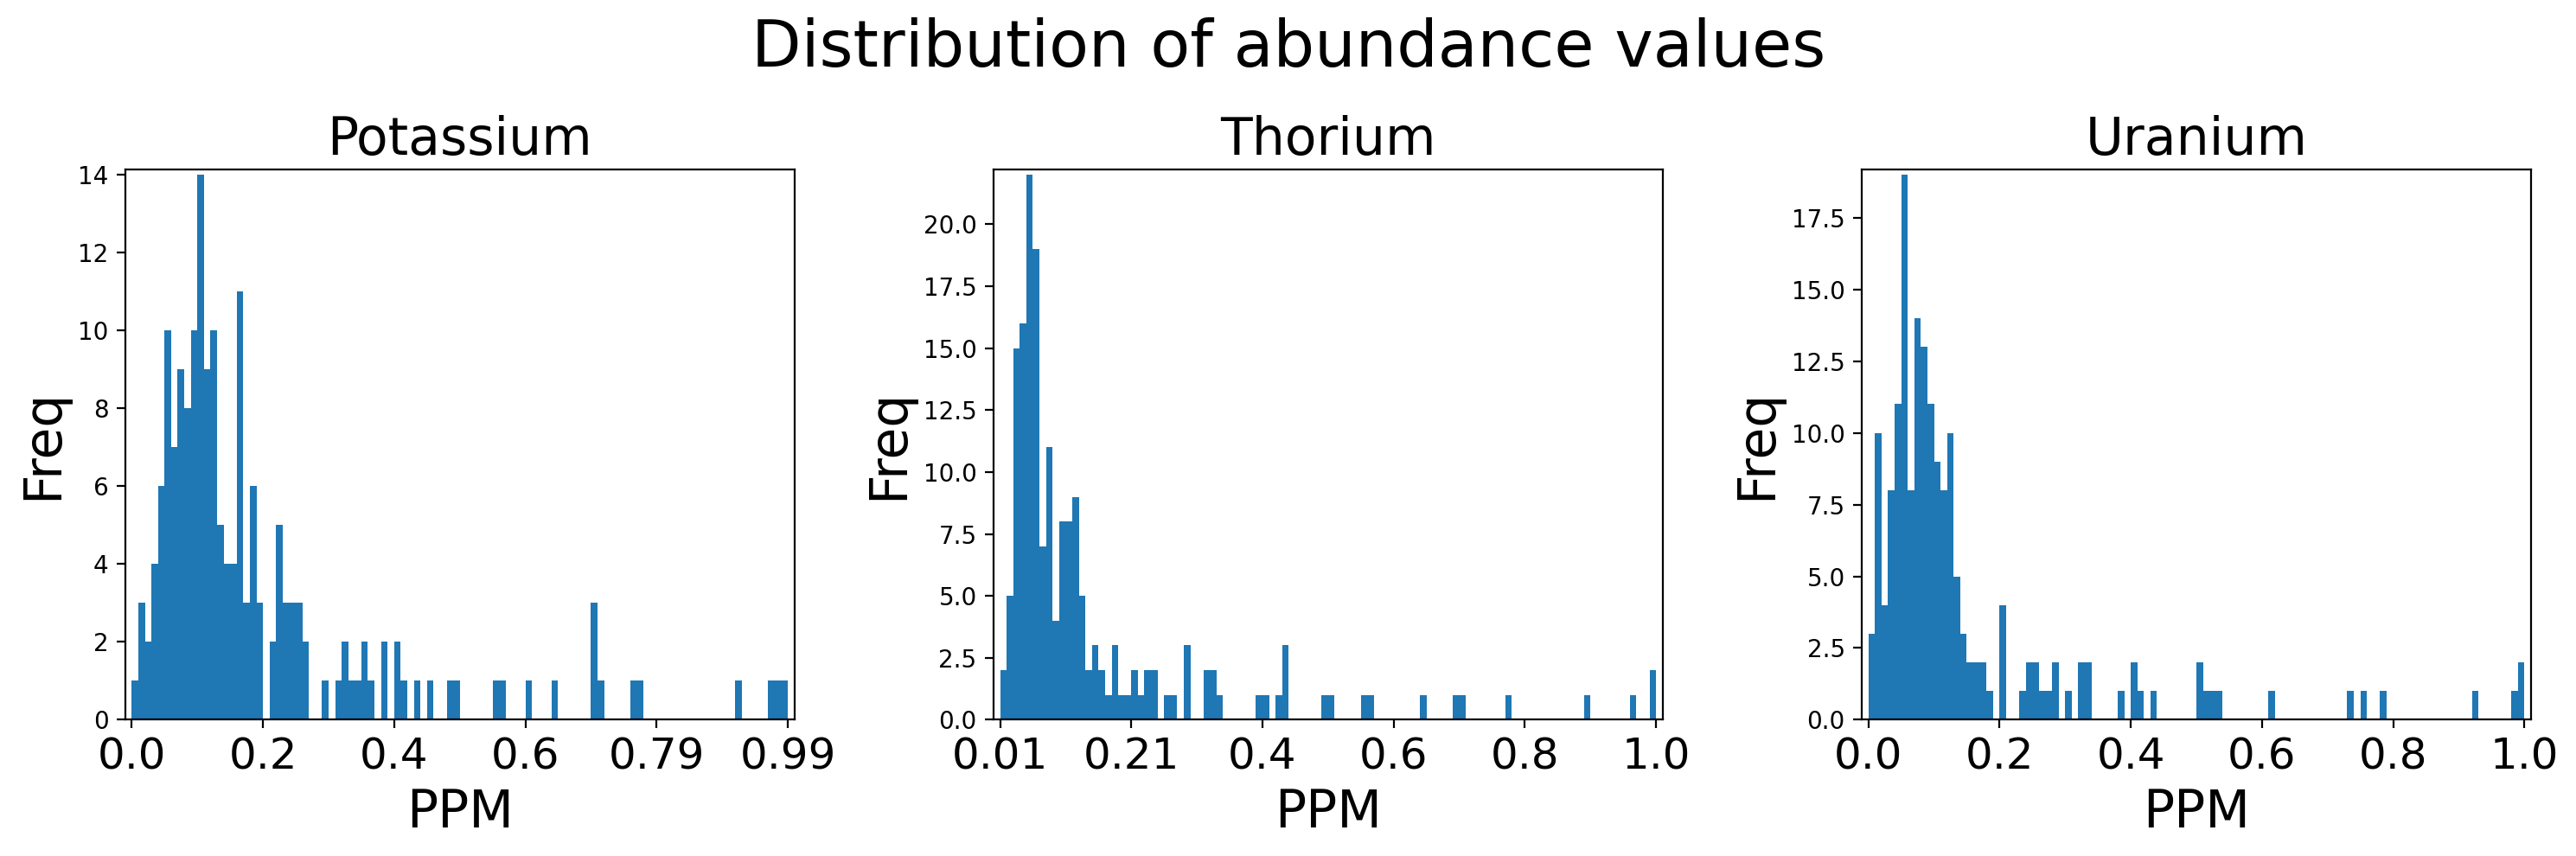

In [30]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

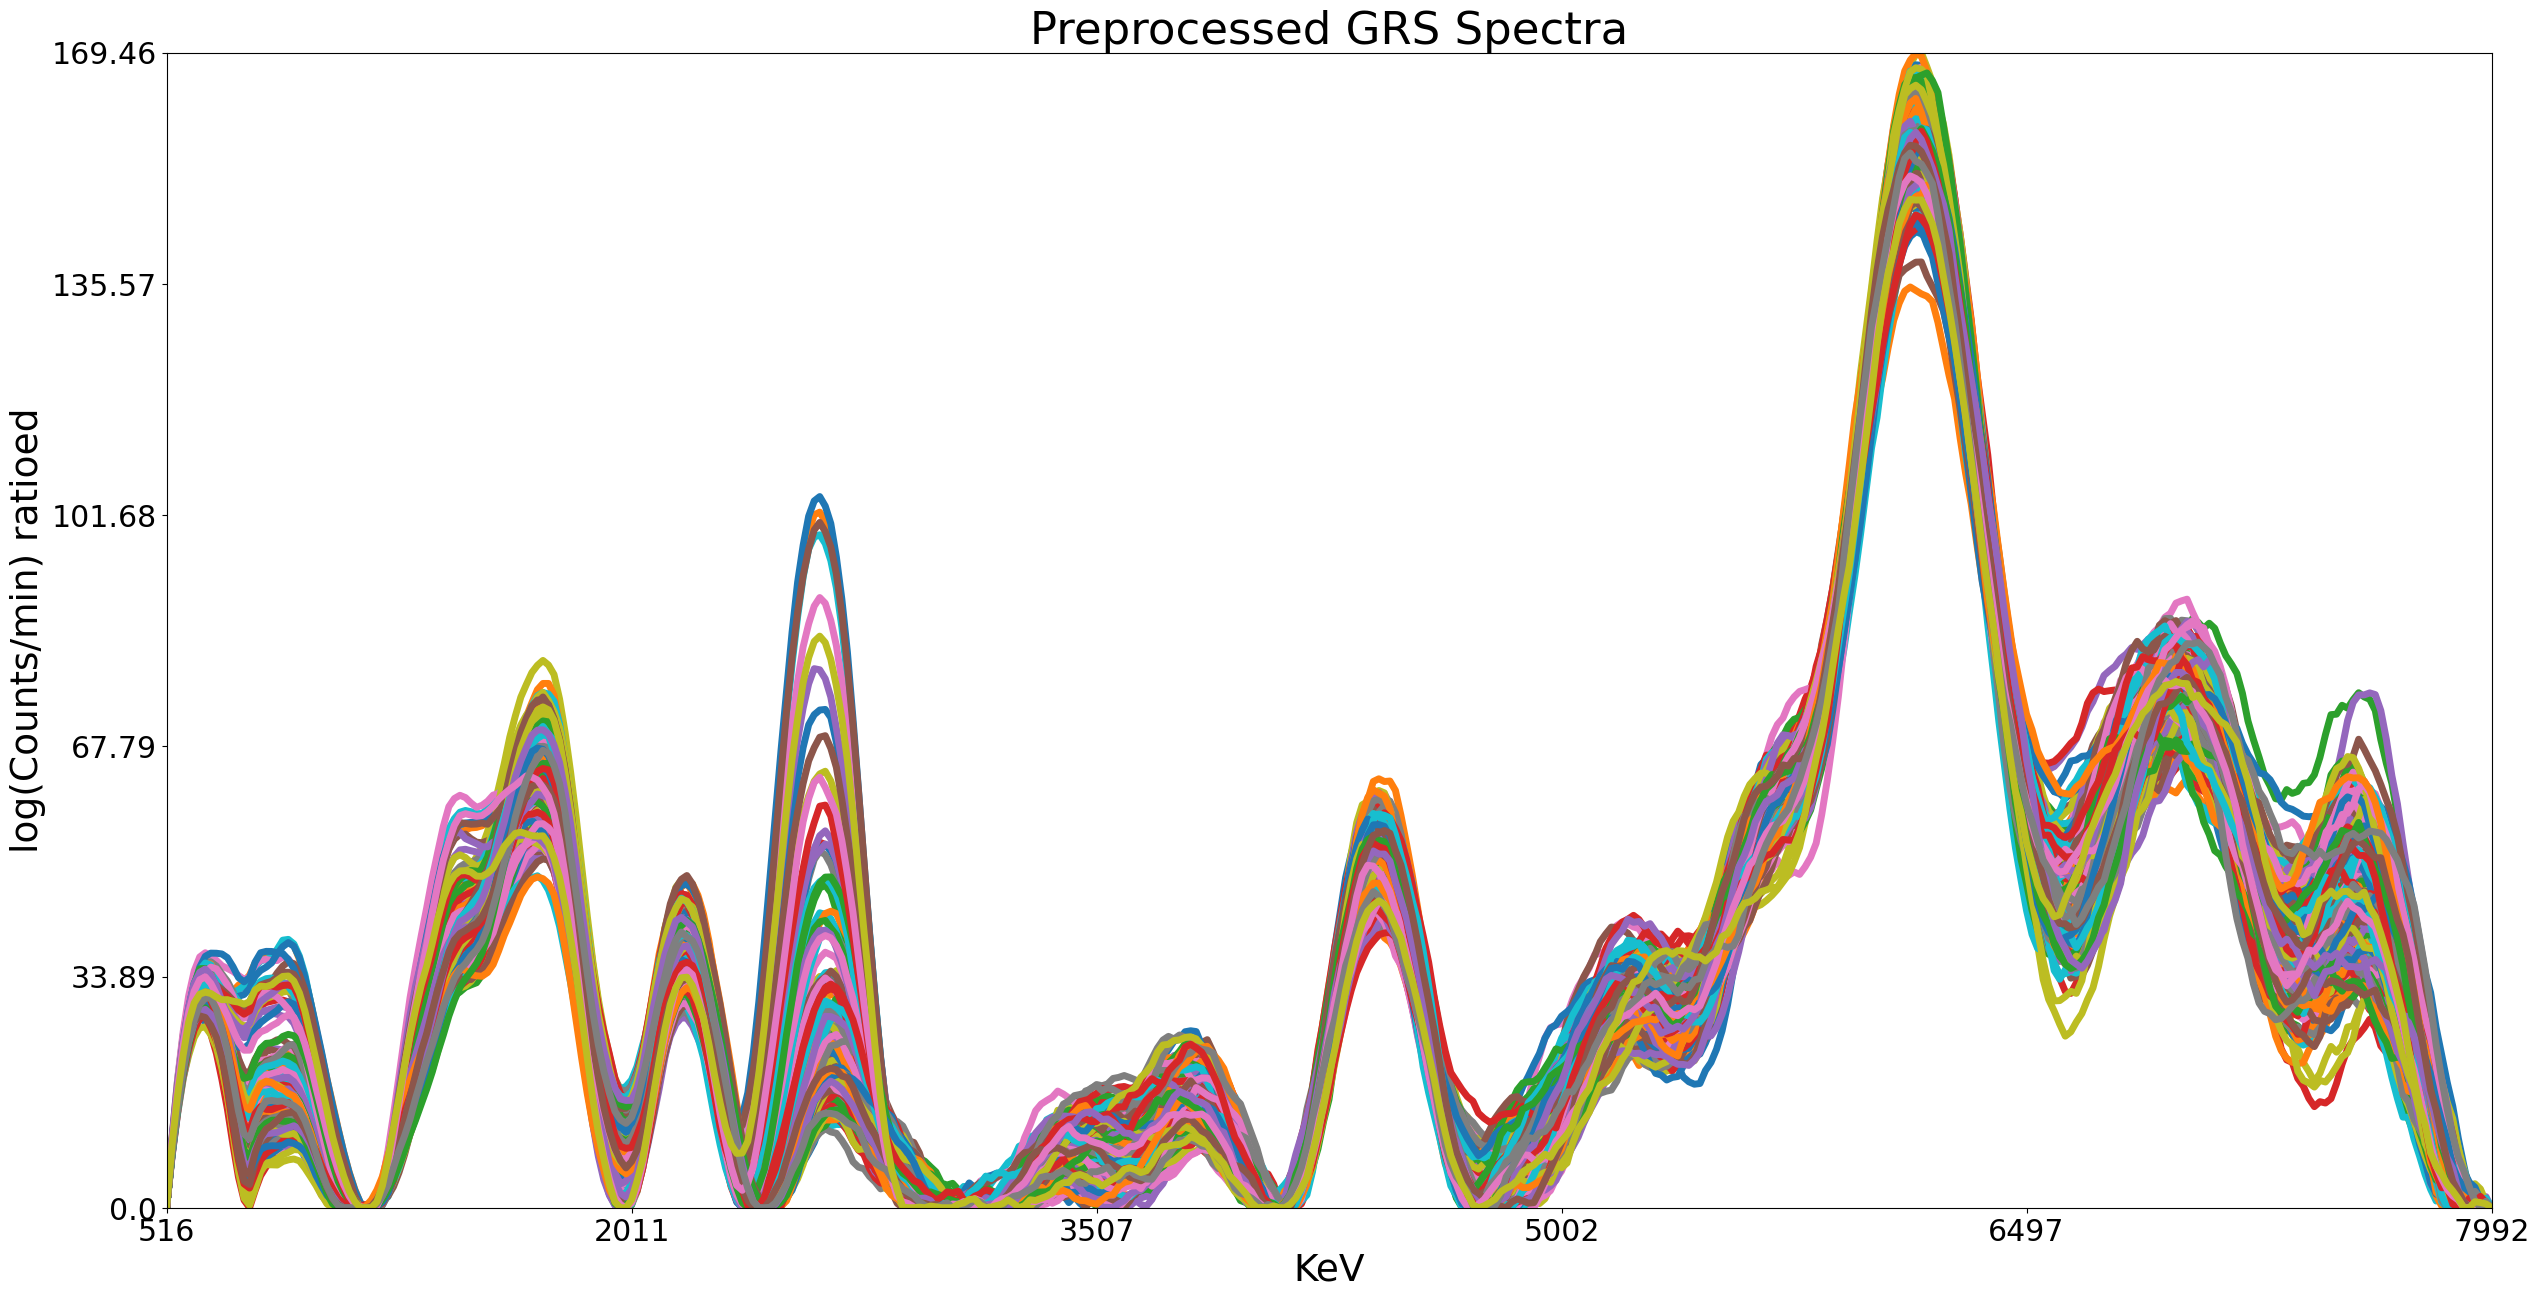

In [31]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [32]:
preprocessedSpectraWithExtraDimension=np.expand_dims(preprocessedSpectra,
                                                     axis=-1)
print(f"Shape of preprocessed spectra: {preprocessedSpectra.shape}")

Shape of preprocessed spectra: (179, 421)


In [33]:
#import tensorflow
import tensorflow as tf

In [34]:
#set default tensor type to float64
tf.keras.backend.set_floatx('float64')

In [35]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [36]:
inputLayer.shape

TensorShape([None, 421, 1])

In [37]:
#create a sobel filter to detect decreasing edge [1,0,-1]
class Sobel1DForwardConvLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Sobel1DForwardConvLayer, self).__init__(**kwargs)

    def build(self,input_shape):
        #define the sobel filter
        sobel_filter=tf.constant([-1,0,1],
                                 dtype=tf.float64
                                )
        
        sobel_filter=tf.expand_dims(tf.expand_dims(sobel_filter,
                                                   axis=-1),
                                    axis=-1
                                   )
        
        self.sobel_filter=tf.tile(sobel_filter,
                                  [1,
                                   input_shape[-1],
                                   1
                                  ]
                                 )
        
        self.sobel_filter=tf.Variable(self.sobel_filter,
                                      trainable=False,
                                      dtype=tf.float64,
                                      name="sobel_filter"
                                     )

    def call(self, inputs):
        return tf.nn.conv1d(inputs,
                            self.sobel_filter,
                            stride=1,
                            padding="SAME"
                           )

#Create an instance of the custom layer
forwardSobelConvLayer=Sobel1DForwardConvLayer()

In [38]:
#create a sobel filter to detect increasing edge [-1,0,1]
class Sobel1DFReverseConvLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Sobel1DFReverseConvLayer, self).__init__(**kwargs)

    def build(self,input_shape):
        #define the sobel filter
        sobel_filter=tf.constant([1,0,-1],
                                 dtype=tf.float64
                                )
        
        sobel_filter=tf.expand_dims(tf.expand_dims(sobel_filter,
                                                   axis=-1),
                                    axis=-1
                                   )
        
        self.sobel_filter=tf.tile(sobel_filter,
                                  [1,
                                   input_shape[-1],
                                   1
                                  ]
                                 )
        
        self.sobel_filter=tf.Variable(self.sobel_filter,
                                      trainable=False,
                                      dtype=tf.float64,
                                      name="sobel_filter"
                                     )

    def call(self, inputs):
        return tf.nn.conv1d(inputs,
                            self.sobel_filter,
                            stride=1,
                            padding="SAME"
                           )

#Create an instance of the custom layer
reverseSobelConvLayer=Sobel1DFReverseConvLayer()

In [39]:
#set the number of channels for the SSIM operations
ssimKernelSize=5
#get the dynamic range for the current spectra
dynamicRange=np.amax(preprocessedSpectra)
#set k1 and k2 parameters for calculating SSIM
k1=0.01
k2=0.03
#calculate the c1 and c2 constants for calculating SSIM
c1=(k1*dynamicRange)**2
c2=(k2*dynamicRange)**2
c1=tf.constant(c1,
               dtype=tf.float64)
c2=tf.constant(c2,
               dtype=tf.float64)

In [40]:
#set the weights for the edges, and textured and smooth areas
edgeWeight=tf.constant(0.50,
                       dtype=tf.float64)
textureWeight=tf.constant(0.25,
                          dtype=tf.float64)
smoothWeight=tf.constant(0.25,
                         dtype=tf.float64)

In [41]:
#create a mean filter
meanFilterLayer=tf.keras.layers.Conv1D(filters=1,
                                       kernel_size=ssimKernelSize,
                                       strides=1,
                                       padding='same',
                                       use_bias=False,
                                       kernel_initializer=tf.keras.initializers.Ones(),
                                       bias_initializer='zeros',
                                       trainable=False)

In [42]:
#create a mean filter in tersorflow
meanFilter=tf.constant(np.ones(ssimKernelSize)/ssimKernelSize,
                       dtype=tf.float64)
#expand the dimension of the mean filter
meanFilter=tf.expand_dims(meanFilter,
                          axis=-1)

#expand the dimension of the mean filter
meanFilter=tf.expand_dims(meanFilter,
                          axis=-1)

In [43]:
'''The above layers and constants are used when computing the three component SSIM loss i.e 3 component Structural dissimilarity'''

'The above layers and constants are used when computing the three component SSIM loss i.e 3 component Structural dissimilarity'

In [44]:
#set a global seed value
globalSeed=23

In [100]:
#define 3 Component Structural Dissimilarity Index Measure (3C_DSSIM) which is equal to (1-3C_SSIM)/2 loss
#the loss is applied to the spectra reconstructed by the non-linear part of the decoder to capture details in the spectra

class threeComponentSturcturalDissilarityIndexMeasure(tf.keras.losses.Loss):
    def call(self,inputSpectra,reconstructedSpectra):
        
        #access the relavent the functions and constants using the global keyword
        global c1
        global c2
        global meanFilterLayer
        global forwardSobelConvLayer
        global reverseSobelConvLayer
        global edgeWeight
        global textureWeight
        global smoothWeight
        global meanFilter
        global ssimKernelSize
        
        #pass the original specta through the mean filter to get the mean filtered spectrum
        meanFilteredOrignalSpectra=tf.nn.conv1d(inputSpectra,
                                                meanFilter,
                                                stride=1,
                                                padding="SAME")
        
        
        #compute variance filtered spectra as the square of the difference between the input spectra and and its mean filtered version
        varianceFilteredOriginalSpectra=tf.math.divide(tf.math.square(tf.math.subtract(inputSpectra,
                                                                                       meanFilteredOrignalSpectra
                                                                                      )
                                                                     ),
                                                       ssimKernelSize
                                                      )
        
        #pass the reconstructed spectra through the mean filter to get the mean filtered spectrum
        meanFilteredReconsturctedSpectra=tf.nn.conv1d(reconstructedSpectra,
                                                      meanFilter,
                                                      stride=1,
                                                      padding="SAME")
        
        
        
        #compute variance filtered spectra as the square of the difference between the input spectra and and its mean filtered version
        varianceFilteredReconstructedSpectra=tf.math.divide(tf.math.square(tf.math.subtract(reconstructedSpectra,
                                                                                            meanFilteredReconsturctedSpectra
                                                                                      )
                                                                     ),
                                                       ssimKernelSize
                                                      )
        
        
        #compute first term of SSIM (the left multiplier in the numerator)
        ssimNumerator1=tf.math.add(tf.math.multiply(tf.math.multiply(meanFilteredOrignalSpectra,
                                                                     meanFilteredReconsturctedSpectra),
                                                    2),
                                   c1)
        
        

        #compute second term of SSIM (the right multiplier in the numerator)
        ssimNumerator2=tf.math.add(tf.math.multiply(tf.math.multiply(tf.math.sqrt(varianceFilteredOriginalSpectra),
                                                                     tf.math.sqrt(varianceFilteredReconstructedSpectra)),
                                                    2),
                                   c2)
        
        

        #compute third term of SSIM (the left multiplier in the denominator)
        ssimDenominator1=tf.math.add(tf.math.add(tf.math.square(meanFilteredOrignalSpectra),
                                                 tf.math.square(meanFilteredReconsturctedSpectra)
                                                ),
                                     c1)
        
        
        

        #compute fourth term of SSIM (the right multiplier in the denominator)
        ssimDenominator2=tf.math.add(tf.math.add(varianceFilteredOriginalSpectra,
                                                 varianceFilteredReconstructedSpectra
                                                ),
                                     c2)
        
        

        #compute SSIM numerator
        ssimNumerator=tf.math.multiply(ssimNumerator1,
                                       ssimNumerator2)
        

        #compute SSIM denominator
        ssimDenominator=tf.math.multiply(ssimDenominator1,
                                         ssimDenominator2)
        
        #add a very small constant to the denominator ensuring stability
        #ssimDenominator=tf.math.add(ssimDenominator,1e-15)
    
        #compute SSIM
        ssim=tf.math.divide(ssimNumerator,
                            ssimDenominator)
        
        
        #compute the gradient on the input spectrum using the sobel filter
        gradientForInputSpectra=tf.math.sqrt(tf.math.add(tf.math.square(forwardSobelConvLayer(inputSpectra)),
                                                         tf.math.square(reverseSobelConvLayer(inputSpectra))
                                                        )
                                            )
        #stabalize square root by setting a minimum value i.e. clipping it
        gradientForInputSpectra=tf.maximum(gradientForInputSpectra,1e-12)
        
        

        #compute the gradient on the reconstructed spectrum using the sobel filter
        gradientForReconstructedSpectra=tf.math.sqrt(tf.math.add(tf.math.square(forwardSobelConvLayer(reconstructedSpectra)),
                                                                 tf.math.square(reverseSobelConvLayer(reconstructedSpectra))
                                                                )
                                                    )
        
        #stabalize square root by setting a minimum value i.e. clipping it
        gradientForReconstructedSpectra=tf.maximum(gradientForReconstructedSpectra,1e-12)
        
        #compute the maximum gradient value in each input spectra
        maxGradientPerSpectra=tf.math.reduce_max(gradientForInputSpectra,axis=-2,keepdims=True)
        maxGradientPerSpectra=tf.repeat(maxGradientPerSpectra,
                                        repeats=inputLayer.shape[-2],
                                        axis=-2)
        
        
        

        #compute the two gradient thresholds used for selecting edges, and textures and smooth areas
        upperThreshold=tf.math.multiply(maxGradientPerSpectra,0.12)
        lowerThreshold=tf.math.multiply(maxGradientPerSpectra,0.06)
        
        


        #select bands corresponding to edges
        edgeFlags=tf.where(tf.math.logical_or(gradientForInputSpectra>upperThreshold,
                                              gradientForReconstructedSpectra>upperThreshold),
                           x=tf.constant(1.0,dtype=tf.float64),
                           y=tf.constant(0.0,dtype=tf.float64))
        #select bands corresponing to smooth areas
        smoothFlags=tf.where(tf.math.logical_and(gradientForInputSpectra<lowerThreshold,
                                                 gradientForReconstructedSpectra<=upperThreshold),
                             x=tf.constant(1.0,dtype=tf.float64),
                             y=tf.constant(0.0,dtype=tf.float64))
        #select bands corresponding to textured areas
        textureFlags=tf.where(tf.math.logical_or(edgeFlags==1,
                                                 smoothFlags==1),
                              x=tf.constant(1.0,dtype=tf.float64),
                              y=tf.constant(0.0,dtype=tf.float64))

        #compute the three components 
        edgeSSIM=tf.math.multiply(ssim,
                                  edgeFlags)
        textureSSIM=tf.math.multiply(ssim,
                                     textureFlags)
        smoothSSIM=tf.math.multiply(ssim,
                                    smoothFlags)
        
        #get the number of channels that are classified as edges, and texture and smooth regions
        noOfEdgeBands=tf.math.reduce_sum(edgeFlags,
                                         axis=-2,
                                         keepdims=False)
        noOfTextureBands=tf.math.reduce_sum(textureFlags,
                                         axis=-2,
                                         keepdims=False)
        noOfSmoothBands=tf.math.reduce_sum(smoothFlags,
                                         axis=-2,
                                         keepdims=False)
        #add a very small value (epsilon) to the no of bands to prevent division by zero
        noOfEdgeBands=tf.math.add(noOfEdgeBands,1e-15)
        noOfTextureBands=tf.math.add(noOfTextureBands,1e-15)
        noOfSmoothBands=tf.math.add(noOfSmoothBands,1e-15)
        
        #average the three components over all channels to get a set of 3 values for each spectrum
        pooledEdgeSSIM=tf.math.divide(tf.math.reduce_sum(edgeSSIM,
                                                         axis=-2,
                                                         keepdims=False),
                                      noOfEdgeBands)
        
        pooledTextureSSIM=tf.math.divide(tf.math.reduce_sum(textureSSIM,
                                                            axis=-2,
                                                            keepdims=False),
                                         noOfTextureBands)
        
        pooledSmoothSSIM=tf.math.divide(tf.math.reduce_sum(smoothSSIM,
                                                           axis=-2,
                                                           keepdims=False),
                                        noOfSmoothBands)
        
        #add the three pooled components to get as single SSIM value for each spectrum
        threeComponentSSIM=tf.math.add(tf.math.multiply(pooledEdgeSSIM,edgeWeight),
                                       tf.math.multiply(pooledTextureSSIM,textureWeight))
        threeComponentSSIM=tf.math.add(threeComponentSSIM,
                                       tf.math.multiply(pooledSmoothSSIM,smoothWeight))
    
        
        #compute dissimilarity from 3C_SSIM
        threeComponentDSSIM=tf.math.divide(tf.math.subtract(tf.constant(1.0,dtype=tf.float64),
                                                            threeComponentSSIM),
                                           tf.constant(2.0,dtype=tf.float64))
        
        
        #return the three component dissimilarity
        return threeComponentDSSIM


In [46]:
# define a funtion which creates the CAM (Channel Attention Module)
def createCAM(inputFeatureBlock,reductionRatio):
    #perform max pooling along the channel dimension
    channelMaxPooledFeatures=tf.math.reduce_max(inputFeatureBlock,
                                                axis=1,
                                                keepdims=False)
    
    #perform avg pooling along the channel dimension
    channelAvgPooledFeatures=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=1,
                                                 keepdims=False)
    
    #create the bottleneck for the MLP
    bottleneckLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1]//reductionRatio,
                                          activation='relu')
    
    #create the recontruction layer for the MLP
    outputLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1],
                                      activation='relu')
    
    
    #pass the max pooled features through the bottle-neck
    reconstructeedMaxPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #pass the avg pooled features through the bottle-neck
    reconstructeedAvgPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #add the two reconstructed features together
    summedFeatures=tf.math.add(reconstructeedMaxPooledFeatures,
                               reconstructeedAvgPooledFeatures)
    
    #apply sigmoid activation to the summed features to get the channel attention map
    channelAttentionMap=tf.keras.activations.sigmoid(summedFeatures)
    
    #return the channel attention map
    return channelAttentionMap

In [47]:
#define a function to create the Spatial attention module (SAM)
def createSAM(inputFeatureBlock,kernelSize):
    #perform max pooling on the input features
    maxPooledFeatureMap=tf.math.reduce_max(inputFeatureBlock,
                                           axis=-1,
                                           keepdims=False)
    #perform average pooling on the input features
    averagePooledFeatureMap=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=-1,
                                                 keepdims=False)
    
    #concatenate the feature maps together
    concatenatedFeatureMaps=tf.concat([tf.expand_dims(maxPooledFeatureMap,
                                                      axis=-1),
                                       tf.expand_dims(averagePooledFeatureMap,
                                                      axis=-1)],
                                      axis=-1)
    
    #create the convolutional layer to be applied to the concatenated feature map
    convolutionLayer=tf.keras.layers.Conv1D(filters=1,
                                            kernel_size=kernelSize,
                                            strides=1,
                                            padding='same',
                                            activation='sigmoid')
    
    
    #get the spatial attention map
    spatialAttentionMap=convolutionLayer(concatenatedFeatureMaps)
    
    
    #return the channel attention map
    return spatialAttentionMap

In [48]:
#define a function which creates a CBAM block
def createCBAM(inputLayer,convolutionalKernelSize,noOfConvolutionalFilters,reductionRatio,spatialKernelSize):
    #create a convolutional layer
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfConvolutionalFilters,
                                              kernel_size=convolutionalKernelSize,
                                              strides=1,
                                              padding='same')
    #get the feature block from the convolutional layer
    convolutionalFeatures=convolutionalLayer(inputLayer)
    
    #get the channel attention map
    channelAttentionMap=createCAM(convolutionalFeatures,
                                  reductionRatio)
    
    #replicate the channel attention to make it multiplicative with the features
    replicatedChannelAttentionMaps=tf.expand_dims(channelAttentionMap,
                                                  axis=1)
    replicatedChannelAttentionMaps=tf.repeat(replicatedChannelAttentionMaps,
                                             convolutionalFeatures.shape[1],
                                             axis=1)
    
    #compute the channel refined feature by performing element-wise multiplication between the features and the channel attention maps
    channelRefinedFeatures=tf.math.multiply(replicatedChannelAttentionMaps,
                                            convolutionalFeatures)
    
    #get the spatial attention map
    spatialAttentionMap=createSAM(channelRefinedFeatures,
                                  spatialKernelSize)
    
    #replicate the attention map to make it multiplicative with the channel-refined features
    replicatedSpatialAttentionMaps=tf.repeat(spatialAttentionMap,
                                             channelRefinedFeatures.shape[-1],
                                             axis=-1)
    
    #multiply the attention map with the channel refined features
    spatiallyRefinedFeatures=tf.math.multiply(replicatedSpatialAttentionMaps,
                                              channelRefinedFeatures)
    
    
    #add the refined features to the original features
    refinedFeatures=tf.math.add(convolutionalFeatures,
                                spatiallyRefinedFeatures)
    
    #return the refined features (i.e. the output of the CBAM)
    return refinedFeatures

In [49]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, stride,, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,dropoutRate,noOfCBAMBLocks):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    preluActivation=tf.keras.layers.PReLU()
    #add the 1st activation layer to the graph
    volume=preluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                         noise_shape=None,
                                         seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    #add the specified number of CBAM blocks
    for i in range(noOfCBAMBLocks):
        #add the CBAM module
        volume=createCBAM(volume,
                          convolutionalKernelSize=kernelSize,
                          noOfConvolutionalFilters=noOfFilters,
                          reductionRatio=2,
                          spatialKernelSize=3)
        
        
        #apply batch norm over the refined features
        batchNormalization=tf.keras.layers.BatchNormalization()
        #add the 1st batch-norm layer to the graph
        volume=batchNormalization(volume)
        
        #apply dropout
        dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                             noise_shape=None,
                                             seed=globalSeed)
        #add the 1st dropout layer to the graph
        volume=dropoutLayer(volume)
    
    return volume

In [50]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[4,4,4,4]

In [51]:
#create a NN (Neural Network) graph containing just the input layer
regularElementFeatures=inputLayer
nuclearElementFeatures=inputLayer

In [52]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    regularElementFeatures=createConvolutionalBlock(regularElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {regularElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [53]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [54]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[2,2,2,2]

In [55]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nuclearElementFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [56]:
#Flatten the features for the nuclear elements
nuclearElementFeatures=tf.keras.layers.Flatten()(nuclearElementFeatures)
print(f"Shape of flattened features {nuclearElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [57]:
#get the regular elements' abundances from the generated features
#it consists of three steps
#1. Apply a dense layer with 7 nodes without any activation
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [58]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return tf.math.divide(inputNodes,
                          sampleWiseSums+1e-10,
                          name=name)

In [59]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation=None)(regularElementFeatures)
#compute absolute values
regularElementStage2=tf.math.abs(regularElementStage1)
#add a normalization layer to the network
regularAbundanceEmbedding=estimateAbundances(regularElementStage2,
                                             name="Regular_Abundances")


#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")


Unscaled regular element shape (None, 7)


In [60]:
#get the abundances for the nuclear elements from their features
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(nuclearElementFeatures)
#compute absolute values
nuclearAbundanceEmbedding=tf.math.abs(nuclearElementStage1,name="Nuclear_Abundances")
#print shape of abundances
print(f"Unscaled regular element shape {nuclearAbundanceEmbedding.shape}")

Unscaled regular element shape (None, 3)


In [61]:
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

print(f"All element shape {fullAbundanceEmbedding.shape}")

All element shape (None, 10)


In [62]:
#define regularization for the element-wise spectra
#the regularizer encourages the elemental spectra to be different
#this is done by computing the pairwise cosine distances, summing them up and maximizing this sum

#as these weights are from seperate (parallel)layers this regularization could not be implemented as inheriting the kernel regularization class
#therefore it is implemented as a loss. As such it recieves the true and predicted values but ignores them
class spectralDisimilarityRegularization(tf.keras.losses.Loss):
    def call(self,_,linearLayerWeights):
        #normalize the weights
        linearLayerWeights=tf.math.l2_normalize(linearLayerWeights,
                                                axis=-2,
                                                epsilon=1e-1)

        #multiply the weights by their transpose to get the dot products (provided the weight vectors have an l2-norm of 1)
        #sum the dot products up to get a value proportional to the sum of pairwise dot products
        unmixingSpectralSimilarity=tf.math.reduce_sum(tf.linalg.matmul(linearLayerWeights,
                                                                       linearLayerWeights,
                                                                       transpose_b=True))
        #compute sum of cosine similarities by subtracting the number of sames from the data and then dividing by half
        unmixingSpectralSimilarity=(unmixingSpectralSimilarity-linearLayerWeights.shape[-1])/2

        #return the similarity estimate which is the regularization value
        return unmixingSpectralSimilarity
    

In [63]:
#create a composite constraint to be applied to the weights of the hidden layers which are the weights
class NonNegetivityConstraint(tf.keras.constraints.Constraint):
    def __init__(self,axis=0):
        self.axis=axis
    def __call__(self, w):
        #apply positivity constraint
        w=w*tf.cast(tf.greater_equal(w,0.0),
                    tf.keras.backend.floatx())
        
        return w



#create the composite constraint by combining the two constraints
nonNegetivityConstraint=NonNegetivityConstraint()

In [64]:
#create an input layer which consists of the number one, it will be used to get the learnt spectra
unitNodeLayer=tf.keras.Input(shape=(1))

In [65]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
abundanceScaledElementalSpectra=[]
#create a list to hold the unscaled elemental spectra
unscaledElementalSpectra=[]
#create a list to hold the unscaled elemental spectra
unscaledElementalSpectra=[]
#iterate through each element
for i in range(fullAbundanceEmbedding.shape[-1]):
    #create a contraintedhidden layer to learn the current element's spectra
    temp=tf.keras.layers.Dense(noOfChannels,
                               activation=None,
                               use_bias=False,
                               kernel_constraint=nonNegetivityConstraint,
                               name=allElementNames[i]+"_Spectra")
    
    
    #save the layer to a list
    elementWiseHiddenLayers.append(temp)
    
    
    #multiply the layer by a the estimated abundance to scale the spectra by the abundance
    temp1=temp(tf.expand_dims(fullAbundanceEmbedding[:,i],
                             -1))
    #save the learnt spectra scaled by the abundance
    abundanceScaledElementalSpectra.append(temp1)
    
    
    #multiply the layer by a the estimated abundance to scale the spectra by the abundance
    temp2=temp(unitNodeLayer)
    #save the learnt spectra
    unscaledElementalSpectra.append(temp2)
    
    #delete the temporary variable
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {abundanceScaledElementalSpectra[-1].shape}")


Shape of the spectra outputed by Aluminum (None, 421)
Shape of the spectra outputed by Calcium (None, 421)
Shape of the spectra outputed by Iron (None, 421)
Shape of the spectra outputed by Magnesium (None, 421)
Shape of the spectra outputed by Oxygen (None, 421)
Shape of the spectra outputed by Silicon (None, 421)
Shape of the spectra outputed by Titanium (None, 421)
Shape of the spectra outputed by Potassium (None, 421)
Shape of the spectra outputed by Thorium (None, 421)
Shape of the spectra outputed by Uranium (None, 421)


In [66]:
#stack the abundance scaled elemental spectra together
abundanceScaledElementalSpectraStack=tf.stack(abundanceScaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra scaled by abundance {abundanceScaledElementalSpectraStack.shape}")

Shape of tensor containing all ten elemental spectra scaled by abundance (None, 421, 10)


In [67]:
#stack the abundance scaled elemental spectra together
unscaledElementalSpectraStack=tf.stack(unscaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra {abundanceScaledElementalSpectraStack.shape}")

Shape of tensor containing all ten elemental spectra (None, 421, 10)


In [68]:
#add the element wise spectra
linearlyReconstructedSpectra=tf.keras.backend.sum(abundanceScaledElementalSpectraStack,
                                        axis=-1,
                                        keepdims=True)
#make the l2-norm of the reconstructed spectra equal to one by dividing it by its norm
linearlyReconstructedSpectra=tf.math.l2_normalize(linearlyReconstructedSpectra,
                                                  axis=-2,
                                                  epsilon=1e-12)
#scale the reconstructed spectra
linearlyReconstructedSpectra=tf.math.multiply(linearlyReconstructedSpectra,1000)
#linearlyMixedSpectra=linearlyReconstructedSpectra[:,:,0]

print(f"Shape of the linearly mixed spectra passed forward {linearlyReconstructedSpectra.shape}")

Shape of the linearly mixed spectra passed forward (None, 421, 1)


In [69]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, stride,, and dropout rate are specified
def createDecoderConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,dropoutRate,noOfCBAMBLocks):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='same')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    preluActivation=tf.keras.layers.PReLU()
    #add the 1st activation layer to the graph
    volume=preluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                         noise_shape=None,
                                         seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    #add the specified number of CBAM blocks
    for i in range(noOfCBAMBLocks):
        #add the CBAM module
        volume=createCBAM(volume,
                          convolutionalKernelSize=kernelSize,
                          noOfConvolutionalFilters=noOfFilters,
                          reductionRatio=2,
                          spatialKernelSize=3)
        
        
        #apply batch norm over the refined features
        batchNormalization=tf.keras.layers.BatchNormalization()
        #add the 1st batch-norm layer to the graph
        volume=batchNormalization(volume)
        
        #apply dropout
        dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                             noise_shape=None,
                                             seed=globalSeed)
        #add the 1st dropout layer to the graph
        volume=dropoutLayer(volume)
    
    return volume

In [70]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[64,32,16]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[3,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[1,1,1]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[1,1,1]

In [71]:
nonLinearReconstructionFeatures=linearlyReconstructedSpectra
#add Convolutional blocks to create the feature extractor for the non-linear part of the decoder
for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nonLinearReconstructionFeatures=createDecoderConvolutionalBlock(nonLinearReconstructionFeatures,
                                                                    noOfChannelsInEachConvBlock[i],
                                                                    filterSizesForEachConvBlock[i],
                                                                    strideSizesForEachConvBlock[i],
                                                                    dropoutForEachConvBlock[i],
                                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the {i}th Conv. Block {nonLinearReconstructionFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 421, 64)
Shape of the tensor outputted by the 1th Conv. Block (None, 421, 32)
Shape of the tensor outputted by the 2th Conv. Block (None, 421, 16)


In [72]:
#create a convolutional layer to output the reconstructed spectra
reconstrucionConvolutionalLayer=tf.keras.layers.Conv1D(filters=1,
                                                       kernel_size=1,
                                                       activation='relu',
                                                       strides=1,
                                                       padding='same')
#get the reconstructed spectra
reconstructedSpectra=reconstrucionConvolutionalLayer(nonLinearReconstructionFeatures)
print(f"Shape of the Reconstructed spectra before normalization {reconstructedSpectra.shape}")

Shape of the Reconstructed spectra before normalization (None, 421, 1)


In [73]:
#normalize the reconstructed spectra
reconstructedSpectra=tf.math.l2_normalize(reconstructedSpectra,
                                          axis=-2,
                                          epsilon=1e-12)
#scale the reconstructed spectra
reconstructedSpectra=tf.math.multiply(reconstructedSpectra,1000)


#print shape of abundances
print(f"Shpe of Reconstructed normalized spectra {reconstructedSpectra.shape}")

Shpe of Reconstructed normalized spectra (None, 421, 1)


In [74]:
#build the model
unmixingModel=tf.keras.Model(inputs=[inputLayer,
                                     unitNodeLayer],
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      linearlyReconstructedSpectra,
                                      reconstructedSpectra,
                                      unscaledElementalSpectraStack
                                     ],
                             name="Attention_Based_Constrainted_Regularized_Dual_Encoder_Two_Stage_Unmixing_Model")

In [101]:
#create loss functions for the embeddings, Mean Squared Error
regularAbundanceLossFunction=tf.keras.losses.MeanSquaredError()
nuclearAbundanceLossFunction=tf.keras.losses.MeanSquaredError()

#create the loss function for the linearly reconstructed spectra, Cosine loss
linearlyRecontructedSpectraLoss=tf.keras.losses.CosineSimilarity()

#create the loss function for the non linearly reconstructed spectra, Cosine loss
#nonLinearlyReconstructedSpectraLoss=tf.keras.losses.CosineSimilarity()

#create the loss function for the non linearly reconstructed spectra, 3C_SDIM loss
nonLinearlyReconstructedSpectraLoss=threeComponentSturcturalDissilarityIndexMeasure()

#create the regularizer
spectralDisimilarityRegularizer=spectralDisimilarityRegularization()

#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6,clipnorm=1.)

#set the number of epochs the model is to be trained for
noOfEpochs=5

#set the batch size
batchSize=16


#steps the number of steps to be processed in one execution
stepsPerExecution=60

In [102]:
#create a loss dictionary
lossDictionary=[regularAbundanceLossFunction,
                nuclearAbundanceLossFunction,
                linearlyRecontructedSpectraLoss,
                nonLinearlyReconstructedSpectraLoss,
                spectralDisimilarityRegularizer
               ]

In [103]:
#creat a list with loss weights
lossWeights=[25e-2, #non-nuclear elemental abundances
             1,     #nuclear elementabl abundances
             1e-3,  #linearly reconstructed spectra
             1e-15,  #non-linearly reconstructed spectra
             1e-15  #spectral dissimilarity regularization
            ]

In [104]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=lossDictionary,
                      loss_weights=lossWeights,
                      steps_per_execution=stepsPerExecution)

In [105]:
#summarize the model
unmixingModel.summary()

Model: "Attention_Based_Constrainted_Regularized_Dual_Encoder_Two_Stage_Unmixing_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 421, 1)]     0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 139, 128)     1024        ['input_1[0][0]']                
                                                                                                  
 p_re_lu (PReLU)                (None, 139, 128)     17792       ['conv1d_1[0][0]']               
                                                                                                  
 batch_normalization (BatchNorm  (None, 139, 128)    512         ['p_re_lu[0][0]']                
 alization)          

                                                                                                  
 tf.repeat_2 (TFOpLambda)       (None, 139, 128)     0           ['tf.expand_dims_3[0][0]']       
                                                                                                  
 tf.math.multiply_2 (TFOpLambda  (None, 139, 128)    0           ['tf.repeat_2[0][0]',            
 )                                                                'conv1d_4[0][0]']               
                                                                                                  
 tf.math.reduce_max_3 (TFOpLamb  (None, 139)         0           ['tf.math.multiply_2[0][0]']     
 da)                                                                                              
                                                                                                  
 tf.math.reduce_mean_3 (TFOpLam  (None, 139)         0           ['tf.math.multiply_2[0][0]']     
 bda)     

 dropout_3 (Dropout)            (None, 139, 128)     0           ['batch_normalization_3[0][0]']  
                                                                                                  
 conv1d_8 (Conv1D)              (None, 139, 128)     114816      ['dropout_3[0][0]']              
                                                                                                  
 tf.math.reduce_max_6 (TFOpLamb  (None, 128)         0           ['conv1d_8[0][0]']               
 da)                                                                                              
                                                                                                  
 dense_6 (Dense)                (None, 64)           8256        ['tf.math.reduce_max_6[0][0]',   
                                                                  'tf.math.reduce_max_6[0][0]']   
                                                                                                  
 dense_7 (

 )                                                                'conv1d_11[0][0]']              
                                                                                                  
 tf.math.reduce_max_9 (TFOpLamb  (None, 45)          0           ['tf.math.multiply_8[0][0]']     
 da)                                                                                              
                                                                                                  
 tf.math.reduce_mean_9 (TFOpLam  (None, 45)          0           ['tf.math.multiply_8[0][0]']     
 bda)                                                                                             
                                                                                                  
 tf.expand_dims_13 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_max_9[0][0]']   
                                                                                                  
 tf.expand

 tf.math.reduce_max_12 (TFOpLam  (None, 256)         0           ['conv1d_15[0][0]']              
 bda)                                                                                             
                                                                                                  
 dense_12 (Dense)               (None, 128)          32896       ['tf.math.reduce_max_12[0][0]',  
                                                                  'tf.math.reduce_max_12[0][0]']  
                                                                                                  
 dense_13 (Dense)               (None, 256)          33024       ['dense_12[0][0]',               
                                                                  'dense_12[1][0]']               
                                                                                                  
 tf.math.add_12 (TFOpLambda)    (None, 256)          0           ['dense_13[0][0]',               
          

                                                                  'tf.expand_dims_23[0][0]']      
                                                                                                  
 conv1d_18 (Conv1D)             (None, 45, 1)        7           ['tf.concat_7[0][0]']            
                                                                                                  
 tf.repeat_15 (TFOpLambda)      (None, 45, 256)      0           ['conv1d_18[0][0]']              
                                                                                                  
 tf.math.multiply_15 (TFOpLambd  (None, 45, 256)     0           ['tf.repeat_15[0][0]',           
 a)                                                               'tf.math.multiply_14[0][0]']    
                                                                                                  
 conv1d_37 (Conv1D)             (None, 139, 128)     1024        ['input_1[0][0]']                
          

 tf.expand_dims_49 (TFOpLambda)  (None, 139, 1)      0           ['tf.math.reduce_max_33[0][0]']  
                                                                                                  
 tf.expand_dims_50 (TFOpLambda)  (None, 139, 1)      0           ['tf.math.reduce_mean_33[0][0]'] 
                                                                                                  
 tf.repeat_16 (TFOpLambda)      (None, 22, 512)      0           ['tf.expand_dims_24[0][0]']      
                                                                                                  
 tf.concat_16 (TFOpLambda)      (None, 139, 2)       0           ['tf.expand_dims_49[0][0]',      
                                                                  'tf.expand_dims_50[0][0]']      
                                                                                                  
 tf.math.multiply_16 (TFOpLambd  (None, 22, 512)     0           ['tf.repeat_16[0][0]',           
 a)       

                                                                  'dense_18[1][0]']               
                                                                                                  
 tf.repeat_34 (TFOpLambda)      (None, 139, 128)     0           ['tf.expand_dims_51[0][0]']      
                                                                                                  
 tf.math.add_18 (TFOpLambda)    (None, 512)          0           ['dense_19[0][0]',               
                                                                  'dense_19[1][0]']               
                                                                                                  
 tf.math.multiply_34 (TFOpLambd  (None, 139, 128)    0           ['tf.repeat_34[0][0]',           
 a)                                                               'conv1d_40[0][0]']              
                                                                                                  
 tf.math.s

                                                                                                  
 conv1d_24 (Conv1D)             (None, 22, 512)      786944      ['dropout_12[0][0]']             
                                                                                                  
 conv1d_43 (Conv1D)             (None, 45, 256)      327936      ['dropout_23[0][0]']             
                                                                                                  
 tf.math.reduce_max_20 (TFOpLam  (None, 512)         0           ['conv1d_24[0][0]']              
 bda)                                                                                             
                                                                                                  
 tf.math.reduce_max_36 (TFOpLam  (None, 256)         0           ['conv1d_43[0][0]']              
 bda)                                                                                             
          

 tf.math.multiply_21 (TFOpLambd  (None, 22, 512)     0           ['tf.repeat_21[0][0]',           
 a)                                                               'tf.math.multiply_20[0][0]']    
                                                                                                  
 tf.math.multiply_37 (TFOpLambd  (None, 45, 256)     0           ['tf.repeat_37[0][0]',           
 a)                                                               'tf.math.multiply_36[0][0]']    
                                                                                                  
 tf.math.add_21 (TFOpLambda)    (None, 22, 512)      0           ['conv1d_24[0][0]',              
                                                                  'tf.math.multiply_21[0][0]']    
                                                                                                  
 tf.math.add_37 (TFOpLambda)    (None, 45, 256)      0           ['conv1d_43[0][0]',              
          

                                                                                                  
 tf.expand_dims_35 (TFOpLambda)  (None, 22, 1)       0           ['tf.math.reduce_mean_23[0][0]'] 
                                                                                                  
 tf.expand_dims_58 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_max_39[0][0]']  
                                                                                                  
 tf.expand_dims_59 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_mean_39[0][0]'] 
                                                                                                  
 tf.concat_11 (TFOpLambda)      (None, 22, 2)        0           ['tf.expand_dims_34[0][0]',      
                                                                  'tf.expand_dims_35[0][0]']      
                                                                                                  
 tf.concat

 tf.math.add_24 (TFOpLambda)    (None, 1024)         0           ['dense_25[0][0]',               
                                                                  'dense_25[1][0]']               
                                                                                                  
 tf.math.add_40 (TFOpLambda)    (None, 512)          0           ['dense_41[0][0]',               
                                                                  'dense_41[1][0]']               
                                                                                                  
 tf.math.sigmoid_12 (TFOpLambda  (None, 1024)        0           ['tf.math.add_24[0][0]']         
 )                                                                                                
                                                                                                  
 tf.math.sigmoid_20 (TFOpLambda  (None, 512)         0           ['tf.math.add_40[0][0]']         
 )        

                                                                                                  
 conv1d_50 (Conv1D)             (None, 22, 512)      786944      ['dropout_27[0][0]']             
                                                                                                  
 tf.math.reduce_max_26 (TFOpLam  (None, 1024)        0           ['conv1d_31[0][0]']              
 bda)                                                                                             
                                                                                                  
 tf.math.reduce_max_42 (TFOpLam  (None, 512)         0           ['conv1d_50[0][0]']              
 bda)                                                                                             
                                                                                                  
 dense_26 (Dense)               (None, 512)          524800      ['tf.math.reduce_max_26[0][0]',  
          

                                                                                                  
 tf.math.multiply_43 (TFOpLambd  (None, 22, 512)     0           ['tf.repeat_43[0][0]',           
 a)                                                               'tf.math.multiply_42[0][0]']    
                                                                                                  
 tf.math.add_27 (TFOpLambda)    (None, 10, 1024)     0           ['conv1d_31[0][0]',              
                                                                  'tf.math.multiply_27[0][0]']    
                                                                                                  
 tf.math.add_43 (TFOpLambda)    (None, 22, 512)      0           ['conv1d_50[0][0]',              
                                                                  'tf.math.multiply_43[0][0]']    
                                                                                                  
 batch_nor

                                                                  'tf.expand_dims_44[0][0]']      
                                                                                                  
 tf.repeat_44 (TFOpLambda)      (None, 10, 1024)     0           ['tf.expand_dims_66[0][0]']      
                                                                                                  
 conv1d_34 (Conv1D)             (None, 10, 1)        7           ['tf.concat_14[0][0]']           
                                                                                                  
 tf.math.multiply_44 (TFOpLambd  (None, 10, 1024)    0           ['tf.repeat_44[0][0]',           
 a)                                                               'conv1d_53[0][0]']              
                                                                                                  
 tf.repeat_29 (TFOpLambda)      (None, 10, 1024)     0           ['conv1d_34[0][0]']              
          

 a)                                                               'conv1d_35[0][0]']              
                                                                                                  
 tf.math.add_46 (TFOpLambda)    (None, 1024)         0           ['dense_47[0][0]',               
                                                                  'dense_47[1][0]']               
                                                                                                  
 tf.math.reduce_max_31 (TFOpLam  (None, 10)          0           ['tf.math.multiply_30[0][0]']    
 bda)                                                                                             
                                                                                                  
 tf.math.reduce_mean_31 (TFOpLa  (None, 10)          0           ['tf.math.multiply_30[0][0]']    
 mbda)                                                                                            
          

                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 1)           0           ['tf.repeat_48[0][0]']           
 da)                                                                                              
                                                                                                  
 dense_49 (Dense)               (None, 3)            30723       ['flatten_1[0][0]']              
                                                                                                  
 tf.math.divide (TFOpLambda)    (None, 7)            0           ['tf.math.abs[0][0]',            
                                                                  'tf.__operators__.add[0][0]']   
                                                                                                  
 tf.math.abs_1 (TFOpLambda)     (None, 3)            0           ['dense_49[0][0]']               
          

 Magnesium_Spectra (Dense)      (None, 421)          421         ['tf.expand_dims_75[0][0]',      
                                                                  'input_2[0][0]']                
                                                                                                  
 Oxygen_Spectra (Dense)         (None, 421)          421         ['tf.expand_dims_76[0][0]',      
                                                                  'input_2[0][0]']                
                                                                                                  
 Silicon_Spectra (Dense)        (None, 421)          421         ['tf.expand_dims_77[0][0]',      
                                                                  'input_2[0][0]']                
                                                                                                  
 Titanium_Spectra (Dense)       (None, 421)          421         ['tf.expand_dims_78[0][0]',      
          

                                                                                                  
 tf.concat_25 (TFOpLambda)      (None, 421, 2)       0           ['tf.expand_dims_83[0][0]',      
                                                                  'tf.expand_dims_84[0][0]']      
                                                                                                  
 conv1d_59 (Conv1D)             (None, 421, 1)       7           ['tf.concat_25[0][0]']           
                                                                                                  
 tf.repeat_50 (TFOpLambda)      (None, 421, 64)      0           ['conv1d_59[0][0]']              
                                                                                                  
 tf.math.multiply_50 (TFOpLambd  (None, 421, 64)     0           ['tf.repeat_50[0][0]',           
 a)                                                               'tf.math.multiply_49[0][0]']    
          

                                                                                                  
 batch_normalization_36 (BatchN  (None, 421, 16)     64          ['p_re_lu_10[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 dropout_36 (Dropout)           (None, 421, 16)      0           ['batch_normalization_36[0][0]'] 
                                                                                                  
 conv1d_64 (Conv1D)             (None, 421, 16)      784         ['dropout_36[0][0]']             
                                                                                                  
 tf.math.reduce_max_52 (TFOpLam  (None, 16)          0           ['conv1d_64[0][0]']              
 bda)                                                                                             
          

In [106]:
#set the address where the untrained model will be saved
untrainedModelWeightsAddress="C:/ML4Sci/Models/untrained_Attention_Based_Constrainted_Regularized_Dual_Encoder_Two_Stage_Unmixing_Model _With_PReLU_Weights.h5"
#untrainedModelWeightsAddress="D:/Non-academic/GSOC23/untrained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"

In [107]:
#save the untrained model
unmixingModel.save_weights(untrainedModelWeightsAddress,
                           overwrite=True)

In [108]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [109]:
#create an array to save the element-wise learnt spectra across folds
foldWiseLearntElementalSpectra=np.zeros((noOfChannels,
                                         fullAbundanceEmbedding.shape[-1]
                                        ))

In [110]:
#unit note to extract learnt spectra
unitMatrix=np.ones(preprocessedSpectra.shape[0])
unitMatrix=unitMatrix.astype('float64')

In [111]:

#load the initial weights of the model (before training)
unmixingModel.load_weights(untrainedModelWeightsAddress)
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=lossDictionary,
                      loss_weights=lossWeights,
                      steps_per_execution=stepsPerExecution)

#fit the model to the current fold's data
currentModelTrainingHistory=unmixingModel.fit(x=[preprocessedSpectra,
                                                 unitMatrix
                                                ],
                                              y=[regularElementalAbundances,
                                                 nuclearElementalAbundances,
                                                 preprocessedSpectra,
                                                 preprocessedSpectraWithExtraDimension,
                                                 nuclearElementalAbundances
                                                ],
                                              batch_size=batchSize,
                                              epochs=noOfEpochs,
                                              verbose=1
                                             )

#print that model history is being saved
print(f"Saving model history, weights and learnt spectra")


#set the address where the untrained model will be saved
#trainedModelWeightsAddress="D:/Non-academic/GSOC23/trained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"
trainedModelWeightsAddress="C:/ML4Sci/Models/untrained_Attention_Based_Constrainted_Regularized_Dual_Encoder_Two_Stage_Unmixing_Model_With_PReLU_Weights.h5"

#save the untrained model
unmixingModel.save_weights(trainedModelWeightsAddress,
                           overwrite=True)

#iterate through all the elements and save their learnt spectra
for i in range(len(allElementNames)):

    #get the mean spectrum for the current element
    currentElementSpectrum=unmixingModel.get_layer(allElementNames[i]+"_Spectra").get_weights()[0][0]

    #save the spectrum
    foldWiseLearntElementalSpectra[:,i]=currentElementSpectrum



Epoch 1/5
12/12 [==============================] - 79s 7s/step - loss: nan - tf.math.divide_loss: nan - tf.math.abs_1_loss: nan - tf.math.multiply_48_loss: nan - tf.math.multiply_55_loss: nan - tf.stack_1_loss: nan
Epoch 2/5
12/12 [==============================] - 14s 1s/step - loss: nan - tf.math.divide_loss: nan - tf.math.abs_1_loss: nan - tf.math.multiply_48_loss: nan - tf.math.multiply_55_loss: nan - tf.stack_1_loss: nan
Epoch 3/5
12/12 [==============================] - 14s 1s/step - loss: nan - tf.math.divide_loss: nan - tf.math.abs_1_loss: nan - tf.math.multiply_48_loss: nan - tf.math.multiply_55_loss: nan - tf.stack_1_loss: nan
Epoch 4/5
12/12 [==============================] - 14s 1s/step - loss: nan - tf.math.divide_loss: nan - tf.math.abs_1_loss: nan - tf.math.multiply_48_loss: nan - tf.math.multiply_55_loss: nan - tf.stack_1_loss: nan
Epoch 5/5
12/12 [==============================] - 14s 1s/step - loss: nan - tf.math.divide_loss: nan - tf.math.abs_1_loss: nan - tf.math.mu

In [112]:
#create a dictionary to hold energies corresponding to the peaks for each element
elementalPeaks={}

#create a temporary list with elemental peaks
tempPeaks=[[843,1014,2211],[1942,3737],[846,1213,1809,7634],
           [1369,1809],[6129],[1779],[983],
           [1460],[584,2615],[609]]

#iterate through all the elements and add their names (keys) and empty arrays (values) which will hold the peak energies to the dictionary
for i in range(len(allElementNames)):
    elementalPeaks[allElementNames[i]]=tempPeaks[i]
    
#delete the temporary array
del tempPeaks

In [113]:
noOfXticks=3
noOfYticks=5

ValueError: arange: cannot compute length

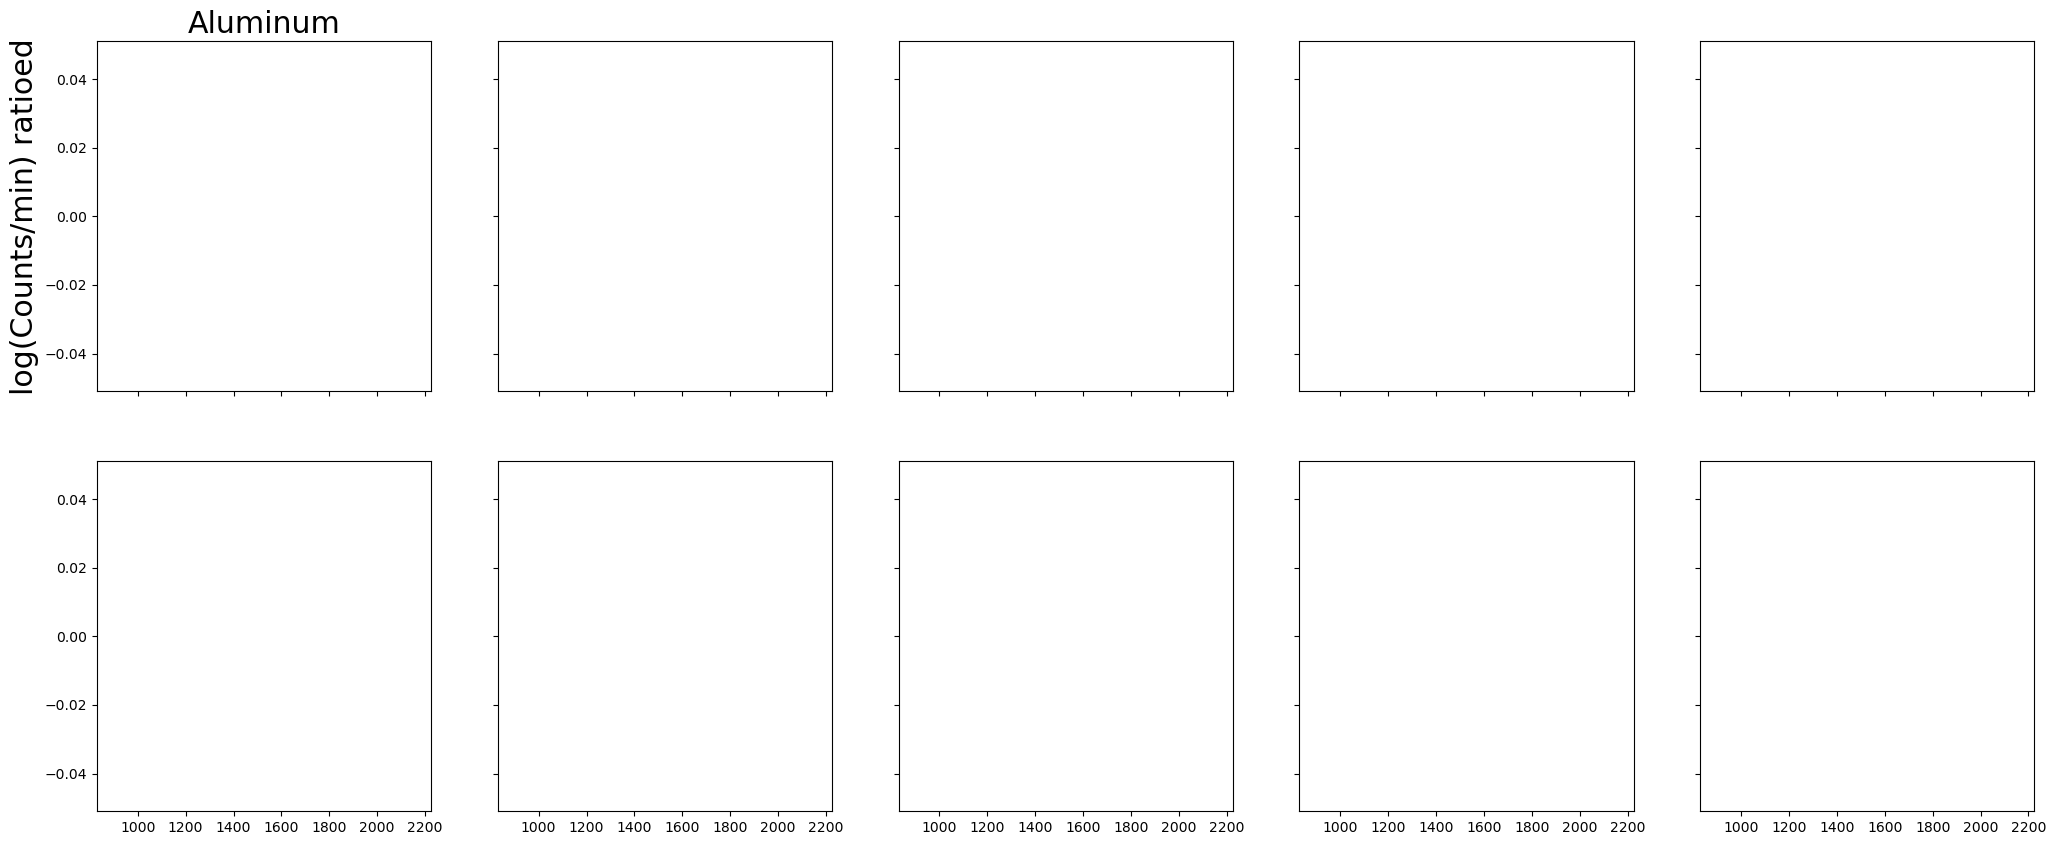

In [114]:
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=True)


#iterate through all the elements
for i in range(len(allElementNames)):

    #get the name of the current element
    currentElementName=allElementNames[i]

    #get the mean spectrum for the current element
    currentElementSpectrum=foldWiseLearntElementalSpectra[:,i]

    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=2)
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    #plot the spectrum
    axes[i//5,i%5].bar(relaventEnergyBands,
                       currentElementSpectrum,
                       lw=10,
                       width=10)
    
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0.01)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(foldWiseLearntElementalSpectra[:,i])+np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks,
                                np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(foldWiseLearntElementalSpectra[:,i])+np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks,
                                                np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra",
                fontsize=baseFontSize*1.5)

In [ ]:
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=True)


#iterate through all the elements
for i in range(len(allElementNames)):

    #get the name of the current element
    currentElementName=allElementNames[i]

    #get the mean spectrum for the current element
    currentElementSpectrum=foldWiseLearntElementalSpectra[:,i]

    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=2)
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    #plot the spectrum
    axes[i//5,i%5].plot(relaventEnergyBands,
                       currentElementSpectrum)
    
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0.01)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(foldWiseLearntElementalSpectra[:,i])+np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks,
                                np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(foldWiseLearntElementalSpectra[:,i])+np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks,
                                                np.ptp(foldWiseLearntElementalSpectra[:,i])/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra",
                fontsize=baseFontSize*1.5)